In [1]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
from keras import optimizers

Using TensorFlow backend.


In [2]:
#chaged string 58 in \Lib\site-packages\keras\datasets\imdb.py  
#from
#np.load(path) as f:
#to
#with np.load(path, allow_pickle=True) as f:

#loading imdb dataset, only most popular 10000 words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
print(train_labels[0])

1


In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
#decoding commentary
#dictionary
word_index = imdb.get_word_index()
#reversing dictionary to get indexes for words
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])
#words are moved by 3, first 3 position revervedfor padding,start,unknown
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

1646592/1641221 [==============================] - 1s 1us/step


In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [16]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 12s 780us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 152us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 154us/step -

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

In [19]:
acc = history_dict['acc']
loss_values = history_dict['loss']
val_loss_valeus = history_dict['val_loss']
epochs = range(1,len(acc) + 1)

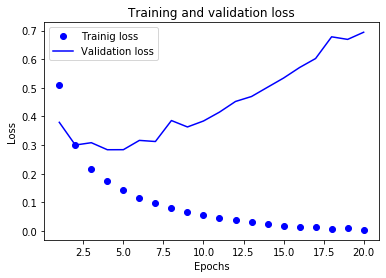

In [20]:
plt.plot(epochs,loss_values,'bo',label='Trainig loss')
plt.plot(epochs,val_loss_valeus,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

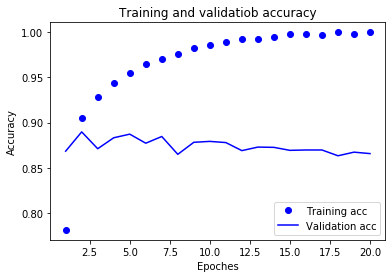

In [21]:
val_acc_values = history_dict['val_acc']
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validatiob accuracy')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend();

In [24]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [35]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [36]:
#model retrained, reducing number of epochs
model.fit(x_train, y_train,  epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 146us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 3s 103us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 3s 101us/step - loss: 0.1982 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 8s 300us/step


In [37]:
results

[0.3231502852916718, 0.87348]

In [38]:
model.predict(x_test)

array([[0.14026144],
       [0.9997028 ],
       [0.2955253 ],
       ...,
       [0.07234982],
       [0.04342842],
       [0.4815339 ]], dtype=float32)

In [45]:
epochs = 10
model = models.Sequential()
model.add(layers.Dense(epochs,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(epochs,activation='relu'))
model.add(layers.Dense(epochs,activation='relu'))
model.add(layers.Dense(epochs,activation='relu'))
model.add(layers.Dense(epochs,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])
model.fit(x_train, y_train,  epochs=epochs, batch_size=512)
print(model.evaluate(x_test, y_test))

Epoch 1/10
25000/25000 [==============================] - 5s 208us/step - loss: 0.1972 - acc: 0.7614
Epoch 2/10
25000/25000 [==============================] - 2s 97us/step - loss: 0.1368 - acc: 0.8999
Epoch 3/10
25000/25000 [==============================] - 2s 94us/step - loss: 0.0959 - acc: 0.9263
Epoch 4/10
25000/25000 [==============================] - 2s 91us/step - loss: 0.0567 - acc: 0.9418
Epoch 5/10
25000/25000 [==============================] - 2s 91us/step - loss: 0.0424 - acc: 0.9512
Epoch 6/10
25000/25000 [==============================] - 2s 91us/step - loss: 0.0346 - acc: 0.9607
Epoch 7/10
25000/25000 [==============================] - 2s 91us/step - loss: 0.0297 - acc: 0.9664
Epoch 8/10
25000/25000 [==============================] - 2s 91us/step - loss: 0.0248 - acc: 0.9728
Epoch 9/10
25000/25000 [==============================] - 2s 91us/step - loss: 0.0225 - acc: 0.9749
Epoch 10/10
25000/25000 [==============================] - 7s 273us/step
[0.10953633297219872, 0.86

In [49]:
epochs = 5
model = models.Sequential()
model.add(layers.Dense(epochs,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(epochs,activation='relu'))
model.add(layers.Dense(epochs,activation='relu'))
model.add(layers.Dense(epochs,activation='relu'))
model.add(layers.Dense(epochs,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])
model.fit(x_train, y_train,  epochs=epochs, batch_size=128)
print(model.evaluate(x_test, y_test))

Epoch 1/5
25000/25000 [==============================] - 8s 320us/step - loss: 0.1839 - acc: 0.7811
Epoch 2/5
25000/25000 [==============================] - 3s 130us/step - loss: 0.0805 - acc: 0.9108
Epoch 3/5
25000/25000 [==============================] - 3s 126us/step - loss: 0.0535 - acc: 0.9333
Epoch 4/5
25000/25000 [==============================] - 3s 126us/step - loss: 0.0424 - acc: 0.9481
Epoch 5/5
25000/25000 [==============================] - 8s 324us/step
[0.09696434506416321, 0.87552]


In [50]:
model = models.Sequential()
model.add(layers.Dense(epochs,activation='tanh',input_shape=(10000,)))
model.add(layers.Dense(epochs,activation='tanh'))
model.add(layers.Dense(epochs,activation='tanh'))
model.add(layers.Dense(epochs,activation='tanh'))
model.add(layers.Dense(epochs,activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])
model.fit(x_train, y_train,  epochs=epochs, batch_size=128)
print(model.evaluate(x_test, y_test))

Epoch 1/5
25000/25000 [==============================] - 8s 320us/step - loss: 0.1242 - acc: 0.8552
Epoch 2/5
25000/25000 [==============================] - 3s 130us/step - loss: 0.0636 - acc: 0.9208
Epoch 3/5
25000/25000 [==============================] - 3s 131us/step - loss: 0.0499 - acc: 0.9392
Epoch 4/5
25000/25000 [==============================] - 3s 127us/step - loss: 0.0415 - acc: 0.9507
Epoch 5/5
25000/25000 [==============================] - 7s 283us/step
[0.10482360838353634, 0.86988]
